## Visualizing the embeddings in 2D

We will use t-SNE to reduce the dimensionality of the embeddings from 2048 to 2. Once the embeddings are reduced to two dimensions, we can plot them in a 2D scatter plot. The dataset is created in the [Obtain_dataset Notebook](Obtain_dataset.ipynb).

### 1. Reduce dimensionality

We reduce the dimensionality to 2 dimensions using t-SNE decomposition.

In [1]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np

# Load the embeddings
# If you have not run the "Obtain_dataset.ipynb" notebook, you can download the datafile from here: https://cdn.openai.com/API/examples/data/fine_food_reviews_with_embeddings_1k.csv
datafile_path = "./data/fine_food_reviews_with_embeddings_1k.csv"
df = pd.read_csv(datafile_path)

# Convert to a list of lists of floats
matrix = np.array(df.ada_similarity.apply(eval).to_list())

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)
vis_dims.shape

(1000, 2)

### 2. Plotting the embeddings

We colour each review by its star rating, ranging from red to green.

We can observe a decent data separation even in the reduced 2 dimensions. There seems to be a cluster of mostly negative reviews.

Text(0.5, 1.0, 'Amazon ratings visualized in language using t-SNE')

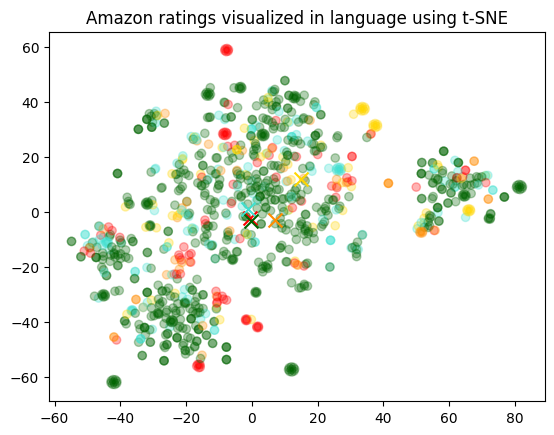

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

colors = ["red", "darkorange", "gold", "turquoise", "darkgreen"]
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]
color_indices = df.Score.values - 1

colormap = matplotlib.colors.ListedColormap(colors)
plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)
for score in [0,1,2,3,4]:
    avg_x = np.array(x)[df.Score-1==score].mean()
    avg_y = np.array(y)[df.Score-1==score].mean()
    color = colors[score]
    plt.scatter(avg_x, avg_y, marker='x', color=color, s=100)

plt.title("Amazon ratings visualized in language using t-SNE")